In [1]:
import glacierml as gl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy.polynomial.polynomial as poly


In [2]:
df = gl.parameterize_data('4')
df = df.drop(['RGIId', 'CenLat','CenLon','Aspect','Zmed','Zmax'],axis = 1)

2.0.0


In [3]:
feat_list = ['Area','Lmax','Slope','Zmin',]
comp = 'Area'

In [4]:
rs = 0

In [5]:
dft = df.sample(frac = 0.8,random_state = 5)
dfr = df.drop(dft.index)

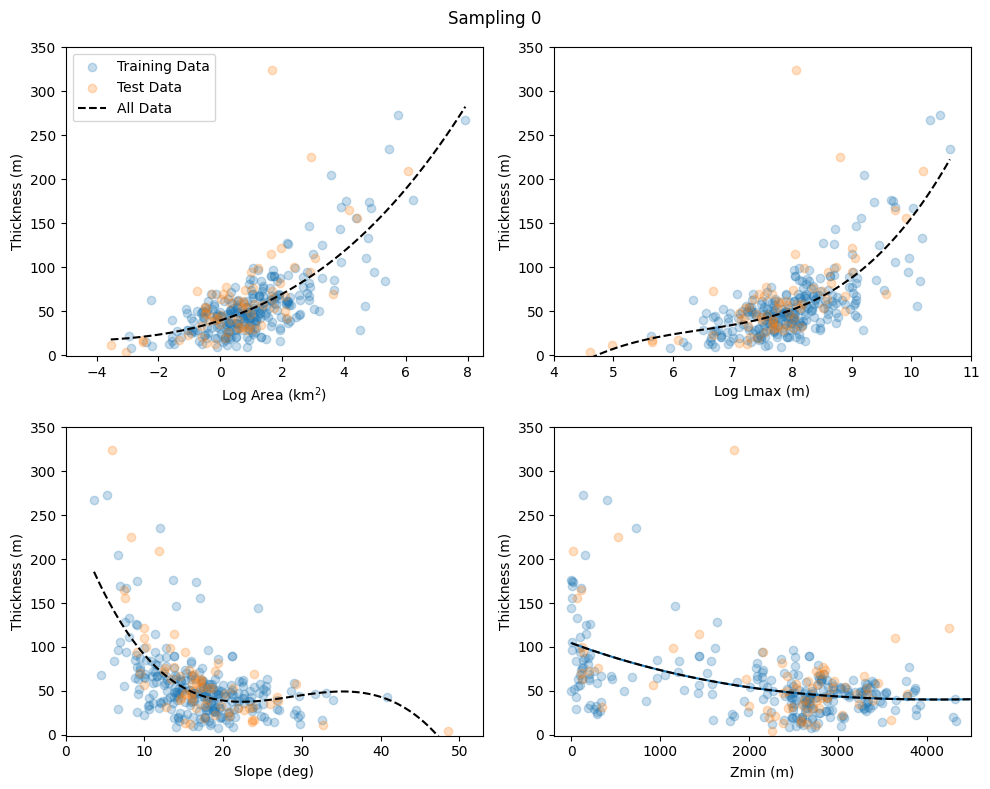

In [6]:
number = '0'
fig, ax = plt.subplots(2, 2, figsize = (10,8))

ax[0][0].scatter(np.log(dft['Area']),dft['Thickness'],alpha = 0.25,label = 'Training Data')
ax[0][1].scatter(np.log(dft['Lmax']),dft['Thickness'],alpha = 0.25)
ax[1][0].scatter(dft['Slope'],dft['Thickness'],alpha = 0.25)
ax[1][1].scatter(dft['Zmin'],dft['Thickness'],alpha = 0.25)

ax[0][0].scatter(np.log(dfr['Area']),dfr['Thickness'],alpha = 0.25, label = 'Test Data')
ax[0][1].scatter(np.log(dfr['Lmax']),dfr['Thickness'],alpha = 0.25)
ax[1][0].scatter(dfr['Slope'],dfr['Thickness'],alpha = 0.25)
ax[1][1].scatter(dfr['Zmin'],dfr['Thickness'],alpha = 0.25)

ax[0][0].set_xlabel('Log Area (km$^2$)')
ax[0][1].set_xlabel('Log Lmax (m)')
ax[1][0].set_xlabel('Slope (deg)')
ax[1][1].set_xlabel('Zmin (m)')

ax[0][0].set_ylabel('Thickness (m)')
ax[0][1].set_ylabel('Thickness (m)')
ax[1][0].set_ylabel('Thickness (m)')
ax[1][1].set_ylabel('Thickness (m)')

ax[0][0].set_ylim(-1,350)
ax[0][1].set_ylim(-1,350)
ax[1][0].set_ylim(-1,350)
ax[1][1].set_ylim(-1,350)

ax[0][0].set_xlim(-5,8.5)
ax[0][1].set_xlim(4,11)
ax[1][0].set_xlim(0,53)
ax[1][1].set_xlim(-200,4500)


dfx = (df['Zmin'])
dfy = df['Thickness']
coeffs0_zmin = poly.polyfit(
    dfx.to_numpy().flatten(), dfy.to_numpy().flatten(),3
)
ffit0_zmin = poly.Polynomial(coeffs0_zmin)
x_new0_zmin = np.linspace(dfx.min(),dfx.max(),100)
ax[1][1].plot(x_new0_zmin, ffit0_zmin(x_new0_zmin), 
#               label="Fit",
#               c = 'k'
             )

dfx = np.log(df['Area'])
dfy = df['Thickness']
coeffs0_area = poly.polyfit(
    dfx.to_numpy().flatten(), dfy.to_numpy().flatten(),3
)
ffit0_area = poly.Polynomial(coeffs0_area)
x_new0_area = np.linspace(dfx.min(),dfx.max(),100)
ax[0][0].plot(x_new0_area, ffit0_area(x_new0_area), 
              label='All Data',
              c = 'k',
              linestyle = '--'
             )

dfx = np.log(df['Lmax'])
dfy = df['Thickness']
coeffs0_lmax = poly.polyfit(
    dfx.to_numpy().flatten(), dfy.to_numpy().flatten(),3
)
ffit0_lmax = poly.Polynomial(coeffs0_lmax)
x_new0_lmax = np.linspace(dfx.min(),dfx.max(),100)
ax[0][1].plot(x_new0_lmax, ffit0_lmax(x_new0_lmax), 
#               label="Fit",
              c = 'k',
              linestyle = '--'
             )


dfx = (df['Slope'])
dfy = df['Thickness']
coeffs0_slope = poly.polyfit(
    dfx.to_numpy().flatten(), dfy.to_numpy().flatten(),3
)
ffit0_slope = poly.Polynomial(coeffs0_slope)
x_new0_slope = np.linspace(dfx.min(),dfx.max(),100)
ax[1][0].plot(x_new0_slope, ffit0_slope(x_new0_slope), 
#               label="Fit",
              c = 'k',
              linestyle = '--'
             )


dfx = (df['Zmin'])
dfy = df['Thickness']
coeffs0_zmin = poly.polyfit(
    dfx.to_numpy().flatten(), dfy.to_numpy().flatten(),3
)
ffit0_zmin = poly.Polynomial(coeffs0_zmin)
x_new0_zmin = np.linspace(dfx.min(),dfx.max(),100)
ax[1][1].plot(x_new0_zmin, ffit0_zmin(x_new0_zmin), 
#               label="Fit",
              c = 'k',
              linestyle = '--'
             )


ax[0][0].legend(loc = 'upper left')
plt.suptitle('Sampling '+ number)

plt.tight_layout()
save_title = 'sample'+number
plt.savefig(f'img/img_{save_title}.png', 
                transparent = False,  
                facecolor = 'white'
               )
plt.show()

In [7]:
def plot_partitioned_data(df4t,df4v,number =  '4'):
    fig, ax = plt.subplots(2, 2, figsize = (10,8))

    ax[0][0].scatter(np.log(df4t['Area']),df4t['Thickness'],alpha = 0.25,label = 'Training Data')
    ax[0][1].scatter(np.log(df4t['Lmax']),df4t['Thickness'],alpha = 0.25)
    ax[1][0].scatter(df4t['Slope'],df4t['Thickness'],alpha = 0.25)
    ax[1][1].scatter(df4t['Zmin'],df4t['Thickness'],alpha = 0.25)


    ax[0][0].set_xlabel('Log Area (km$^2$)')
    ax[0][1].set_xlabel('Log Lmax (m)')
    ax[1][0].set_xlabel('Slope (deg)')
    ax[1][1].set_xlabel('Zmin (m)')

    ax[0][0].set_ylabel('Thickness (m)')
    ax[0][1].set_ylabel('Thickness (m)')
    ax[1][0].set_ylabel('Thickness (m)')
    ax[1][1].set_ylabel('Thickness (m)')

    ax[0][0].set_ylim(-1,350)
    ax[0][1].set_ylim(-1,350)
    ax[1][0].set_ylim(-1,350)
    ax[1][1].set_ylim(-1,350)

    ax[0][0].set_xlim(-5,8.5)
    ax[0][1].set_xlim(4,11)
    ax[1][0].set_xlim(0,53)
    ax[1][1].set_xlim(-200,4500)

    for feat in (feat_list):
        dfx = df4v[feat]
        dfy = df4v['Thickness']
        if feat == 'Area':
            dfx = np.log(dfx)

            ax[0][0].scatter(
                dfx,dfy,alpha = 0.25,label="Validation Data",
                c = '#d62728',
            )

        elif feat == 'Lmax':
            dfx = np.log(dfx)

            ax[0][1].scatter(
                dfx,dfy,alpha = 0.25,
                c = '#d62728',
    #             label="Validation Data",
            )

        elif feat == 'Slope':

            ax[1][0].scatter(
                dfx,dfy,alpha = 0.25,
                c = '#d62728',
    #             label="Validation Data",
            )
        elif feat == 'Zmin':
            ax[1][1].scatter(
                dfx,dfy,alpha = 0.25,
                c = '#d62728',
    #             label="Validation Data",
            )


    dfx = np.log(df['Area'])
    dfy = df['Thickness']
    coeffs0_area = poly.polyfit(
        dfx.to_numpy().flatten(), dfy.to_numpy().flatten(),3
    )
    ffit0_area = poly.Polynomial(coeffs0_area)
    x_new0_area = np.linspace(dfx.min(),dfx.max(),100)
    ax[0][0].plot(x_new0_area, ffit0_area(x_new0_area), 
                  label='All Data',
                  c = 'k',
                  linestyle = '--',
                  alpha = 0.5
                 )

    dfx = np.log(df['Lmax'])
    dfy = df['Thickness']
    coeffs0_lmax = poly.polyfit(
        dfx.to_numpy().flatten(), dfy.to_numpy().flatten(),3
    )
    ffit0_lmax = poly.Polynomial(coeffs0_lmax)
    x_new0_lmax = np.linspace(dfx.min(),dfx.max(),100)
    ax[0][1].plot(x_new0_lmax, ffit0_lmax(x_new0_lmax), 
    #               label="Fit",
                  c = 'k',
                  linestyle = '--',
                  alpha = 0.5
                 )


    dfx = (df['Slope'])
    dfy = df['Thickness']
    coeffs0_slope = poly.polyfit(
        dfx.to_numpy().flatten(), dfy.to_numpy().flatten(),3
    )
    ffit0_slope = poly.Polynomial(coeffs0_slope)
    x_new0_slope = np.linspace(dfx.min(),dfx.max(),100)
    ax[1][0].plot(x_new0_slope, ffit0_slope(x_new0_slope), 
    #               label="Fit",
                  c = 'k',
                  linestyle = '--',
                  alpha = 0.5
                 )


    dfx = (df['Zmin'])
    dfy = df['Thickness']
    coeffs0_zmin = poly.polyfit(
        dfx.to_numpy().flatten(), dfy.to_numpy().flatten(),3
    )
    ffit0_zmin = poly.Polynomial(coeffs0_zmin)
    x_new0_zmin = np.linspace(dfx.min(),dfx.max(),100)
    ax[1][1].plot(x_new0_zmin, ffit0_zmin(x_new0_zmin), 
    #               label="Fit",
                  c = 'k',
                  linestyle = '--',
                  alpha = 0.5
                 )


    ax[0][0].legend(loc = 'upper left')
    plt.suptitle('Sampling '+ number)

    plt.tight_layout()
    save_title = 'sample'+number
    plt.savefig(f'img/img_{save_title}.png', 
                    transparent = False,  
                    facecolor = 'white'
                   )
    plt.show()

In [8]:
df1t = dft.sample(frac = 0.2, random_state = 5)
dft = dft.drop(df1t.index)

df2t = dft.sample(frac = 0.25, random_state = 5)
dft = dft.drop(df2t.index)

df3t = dft.sample(frac = 0.3, random_state = 5)
dft = dft.drop(df3t.index)

df4t = dft.sample(frac = 0.5, random_state = 5)
dft = dft.drop(df4t.index)

df5t = dft

df1v = df1t.sample(frac = 0.2, random_state = 5)
df1t = df1t.drop(df1v.index)

df2v = df2t.sample(frac = 0.2, random_state = 5)
df2t = df2t.drop(df2v.index)

df3v = df3t.sample(frac = 0.2, random_state = 5)
df3t = df3t.drop(df3v.index)

df4v = df4t.sample(frac = 0.2, random_state = 5)
df4t = df4t.drop(df4v.index)

df5v = df5t.sample(frac = 0.2, random_state = 5)
df5t = df5t.drop(df5v.index)

In [9]:
dft_list = [df1t,df2t,df3t,df4t,df5t]
dfv_list = [df1v,df2v,df3v,df4v,df5v]
num_list = ['1','2','3','4','5']

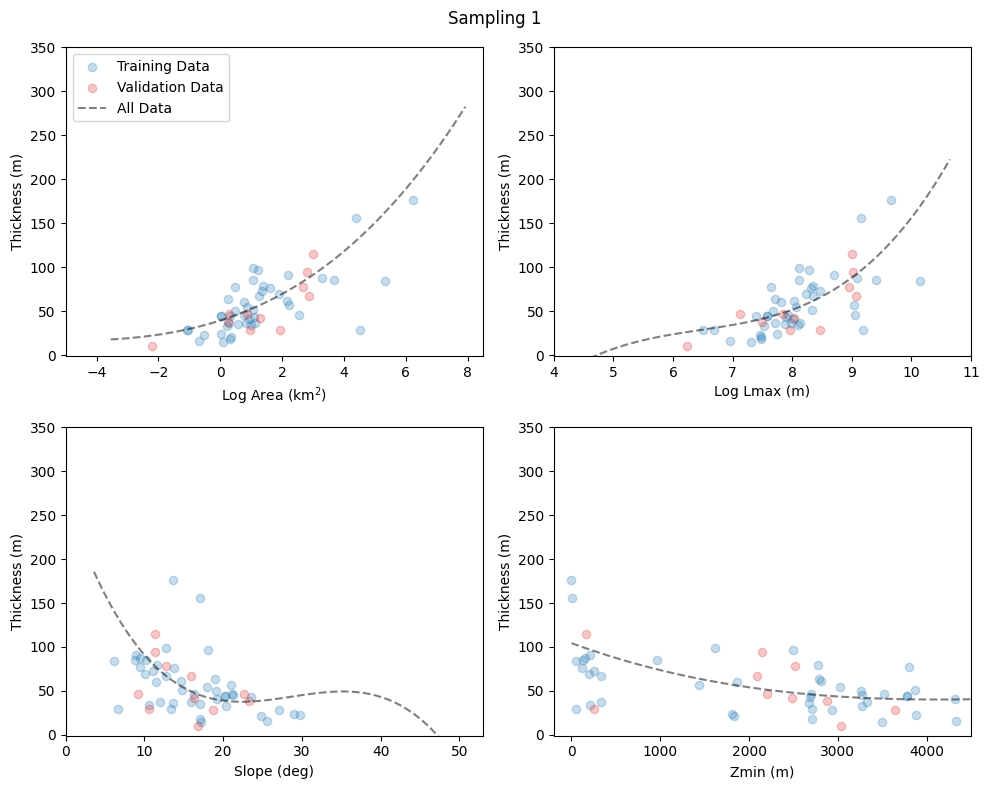

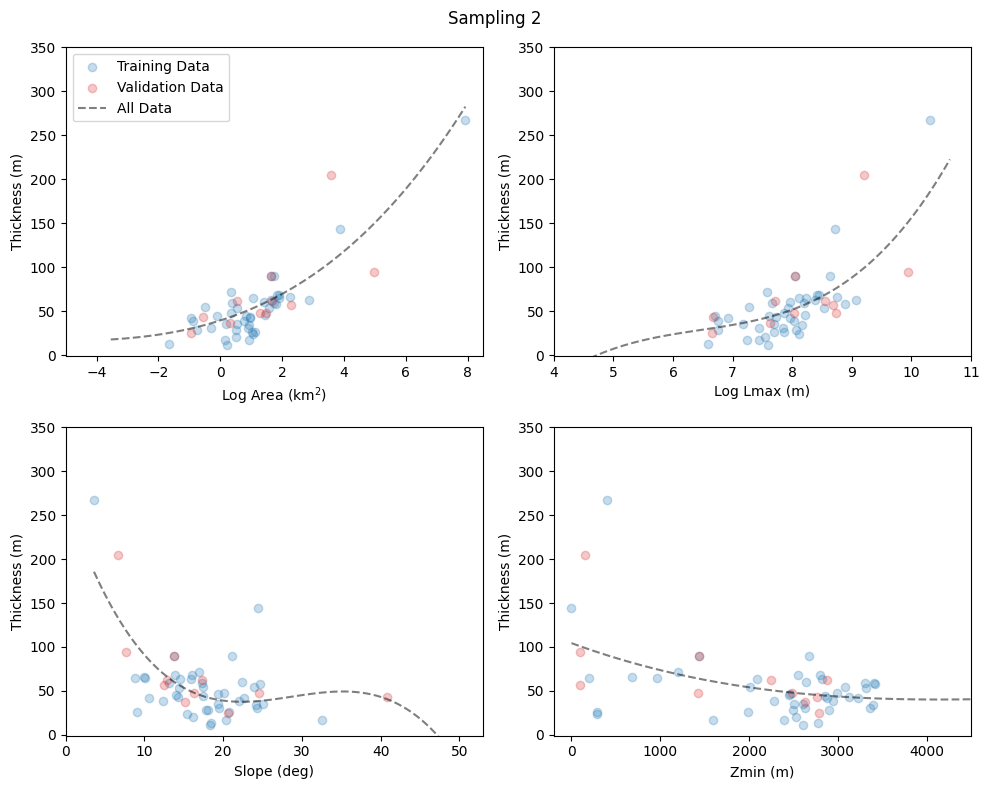

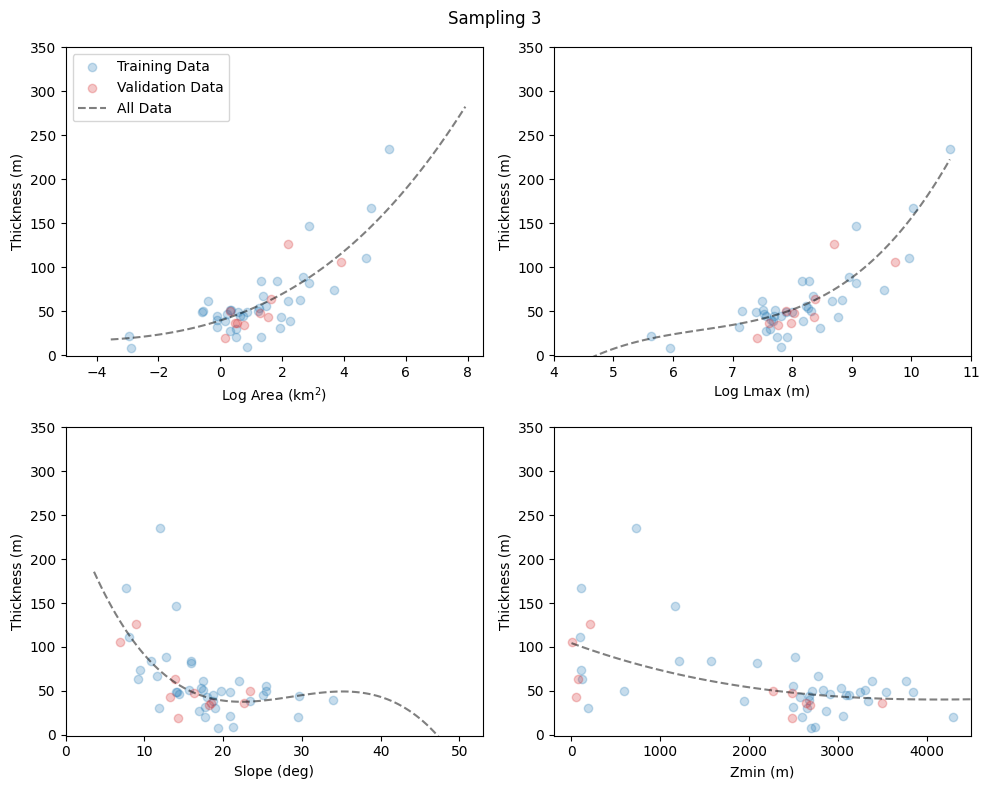

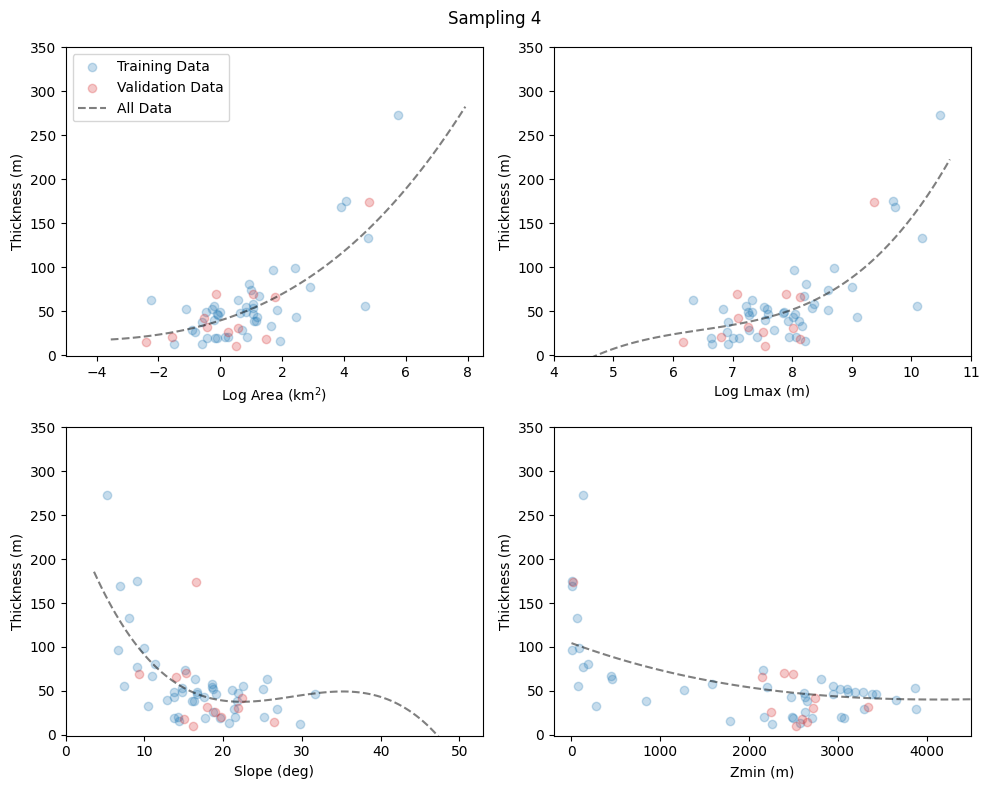

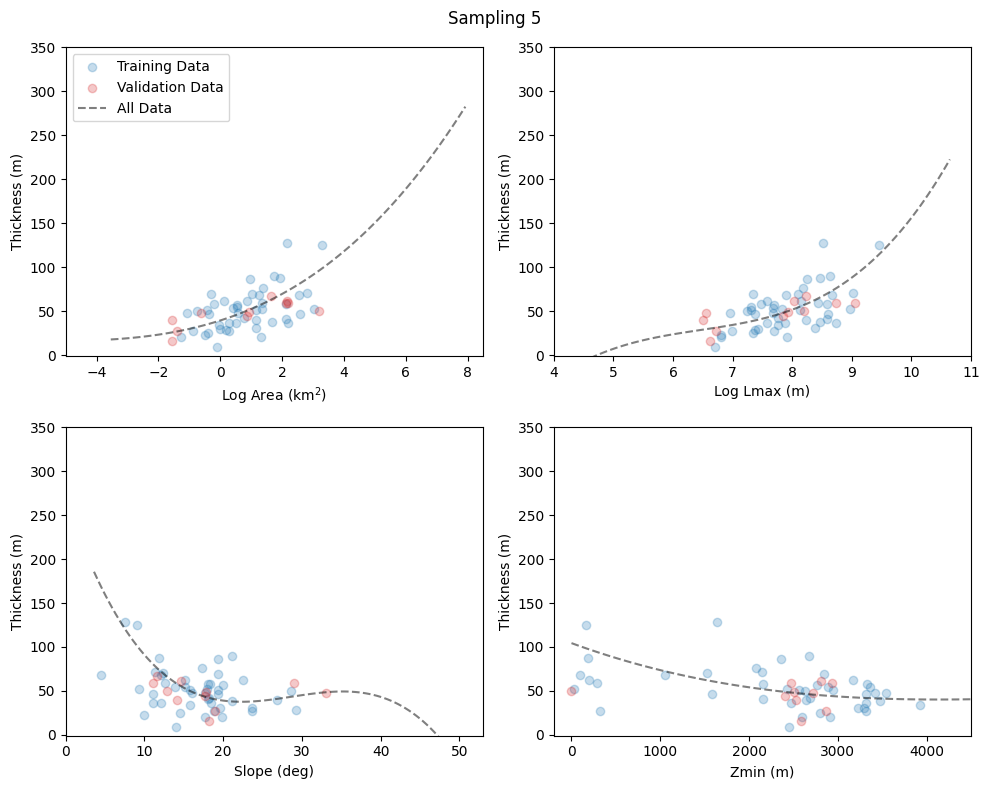

In [10]:
for i,j,k in zip(dft_list, dfv_list,num_list):
    plot_partitioned_data(i,j,k)

In [12]:
import imageio

frames = []
for k in range(0,6,1):
    save_path = 'sample' + str(k)
    image = imageio.v2.imread(f'img/img_{save_path}.png')
    frames.append(image)
imageio.mimsave('training_sampling' + '0_example.gif', # output gif
                frames,          # array of input frames
                duration = 3000,
                loop = 50
               )   